## KNN regression

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load data and preliminary plots

In [22]:
df = pd.read_csv('../../02_dataset/merged_df.csv')

In [23]:
df.columns

Index(['Unnamed: 0', 'ISO3_code', 'Year', 'country', 'yearly_avg_rainfall',
       'rainfall_var_t', 'rainfall_var_t_1', 'yearly_avg_temp', 'temp_var_t',
       'temp_var_t_1', 'pt_gdp_agriculture', 'oil_rent', 'democracy_polity',
       'ethnic_fractionation_index', 'gdp', 'gdp_pchange', 'gdp_percap',
       'gdp_percap_pchange', 'unemp_rate', 'unemp_rate_pchange', 'gini',
       'gini_pchange', 'population', 'participants', 'protest_fraction'],
      dtype='object')

In [24]:
df.head(5)

,Unnamed: 0,ISO3_code,Year,country,yearly_avg_rainfall,rainfall_var_t,rainfall_var_t_1,yearly_avg_temp,temp_var_t,temp_var_t_1,...,gdp_pchange,gdp_percap,gdp_percap_pchange,unemp_rate,unemp_rate_pchange,gini,gini_pchange,population,participants,protest_fraction
0,0,AFG,1960,Afghanistan,318.565807,-0.075064,-0.075064,116.206019,0.036755,0.036755,...,NaN,1454.1108,NaN,7.908,NaN,NaN,NaN,NaN,NaN,NaN
1,1,AFG,1961,Afghanistan,294.653108,-0.075064,-0.075064,120.477183,0.036755,0.036755,...,0.0,1454.1108,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN
2,2,AFG,1962,Afghanistan,243.503638,-0.173592,-0.075064,117.250992,-0.026778,0.036755,...,0.0,1454.1108,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN
3,3,AFG,1963,Afghanistan,307.702050,0.263645,-0.173592,126.046296,0.075013,-0.026778,...,0.0,1454.1108,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN
4,4,AFG,1964,Afghanistan,300.362434,-0.023853,0.263645,110.172619,-0.125935,0.075013,...,0.0,1454.1108,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN


In [25]:
# drop rows with NaNs
df = df.dropna()

In [26]:
df.sort_values(by=['Year'])
df.head(5)

,Unnamed: 0,ISO3_code,Year,country,yearly_avg_rainfall,rainfall_var_t,rainfall_var_t_1,yearly_avg_temp,temp_var_t,temp_var_t_1,...,gdp_pchange,gdp_percap,gdp_percap_pchange,unemp_rate,unemp_rate_pchange,gini,gini_pchange,population,participants,protest_fraction
94,94,ALB,1990,Albania,722.833333,0.066575,-0.123247,111.416667,0.049451,-0.018814,...,-9.575638,5407.3247,47.849697,10.304,0.000000,0.310099,0.0,3286542.0,31250.0,0.009508
95,95,ALB,1991,Albania,827.910714,0.145369,0.066575,100.809524,-0.095202,0.049451,...,-28.002145,3916.6973,-27.566819,10.304,0.000000,0.310099,0.0,3266790.0,62250.0,0.019055
96,96,ALB,1992,Albania,706.226190,-0.146978,0.145369,108.535714,0.076641,-0.095202,...,-7.187107,3657.3120,-6.622552,30.007,191.217003,0.310099,0.0,3247039.0,22050.0,0.006791
97,97,ALB,1993,Albania,739.125000,0.046584,-0.146978,106.708333,-0.016837,0.076641,...,9.559405,4031.4531,10.229948,25.251,-15.849635,0.310099,0.0,3227287.0,20050.0,0.006213
98,98,ALB,1994,Albania,802.047619,0.085131,0.046584,117.636905,0.102415,-0.016837,...,8.302867,4393.0650,8.969766,20.835,-17.488416,0.310099,0.0,3207536.0,2500.0,0.000779


In [27]:
df['ISO3_code'].unique()

array(['ALB', 'DZA', 'AGO', 'ARM', 'AUT', 'AZE', 'BGD', 'BLR', 'BEL',
       'BEN', 'BTN', 'BOL', 'BWA', 'BRA', 'BGR', 'BFA', 'BDI', 'CAN',
       'CAF', 'TCD', 'CHL', 'COL', 'CRI', 'HRV', 'CYP', 'DNK', 'DJI',
       'DOM', 'ECU', 'SLV', 'EST', 'ETH', 'FIN', 'GAB', 'GEO', 'GHA',
       'GRC', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HUN', 'IDN',
       'IRQ', 'IRL', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'LVA',
       'LBN', 'LSO', 'LBR', 'LTU', 'MDG', 'MWI', 'MYS', 'MLI', 'MRT',
       'MEX', 'MDA', 'MNG', 'MAR', 'MMR', 'NAM', 'NPL', 'NLD', 'NIC',
       'NER', 'NGA', 'NOR', 'PAK', 'PAN', 'PRY', 'PER', 'PHL', 'POL',
       'PRT', 'QAT', 'ROU', 'RWA', 'SEN', 'SRB', 'SLE', 'SVN', 'ZAF',
       'ESP', 'LKA', 'SDN', 'SWE', 'CHE', 'TJK', 'TZA', 'THA', 'TGO',
       'TUN', 'TKM', 'UGA', 'UKR', 'GBR', 'URY', 'UZB', 'ZMB', 'ZWE'],
      dtype=object)

#### Select country and year range

In [28]:
iso1 = 'PAK'
iso2 = 'UKR'
iso3 = 'IRQ'
iso = iso3
year_begin = 1960
year_end = 2023
features = ['Year', 'gdp', 'gdp_percap', 'yearly_avg_rainfall', 'rainfall_var_t', 'rainfall_var_t_1','temp_var_t', 'pt_gdp_agriculture', 'democracy_polity', 'ethnic_fractionation_index', 'unemp_rate', 'protest_fraction']
target = 'participants'

# Filter by 'ISO3_code' (assuming it's the correct column name) and 'Year' range
df_plot = df[(df['ISO3_code'] == iso) & (df['Year'] >= year_begin) & (df['Year'] < year_end)]

# Select only the relevant features
df_plot = df_plot[features]

In [29]:
#sns.pairplot(df_plot)

## Relationship between environmental and economical conditions in a given year

### Yearly average rainfall $\times$ GDP % from agriculture

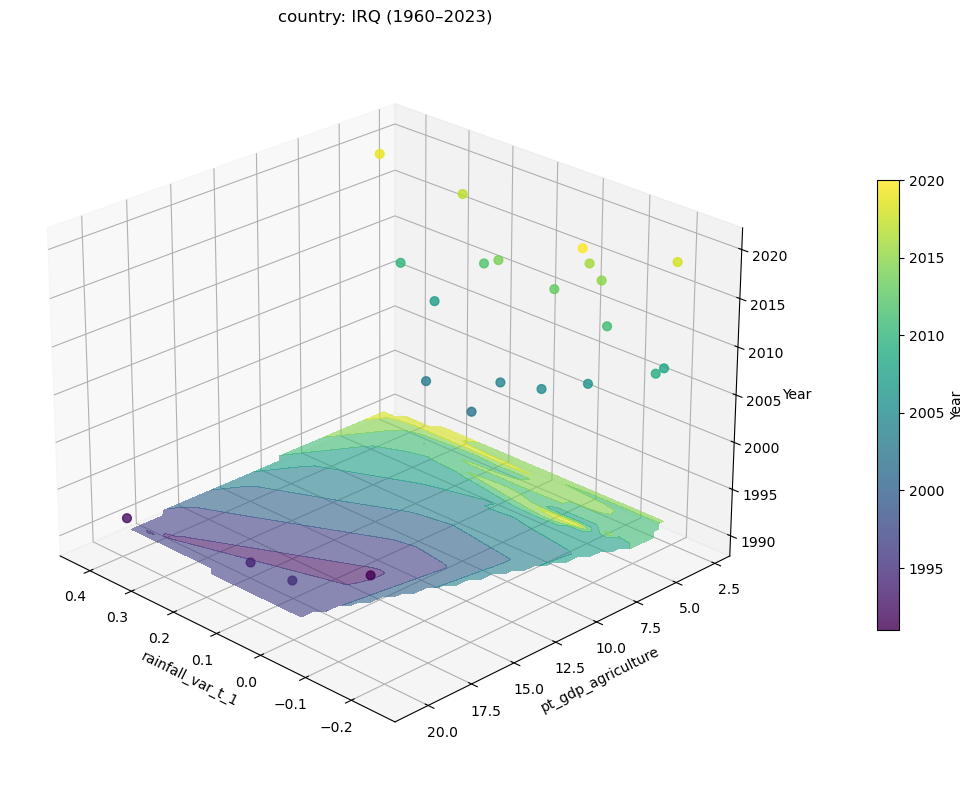

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Input features
x1 = 'rainfall_var_t_1'#'yearly_avg_rainfall'
x2 = 'pt_gdp_agriculture'

# Set target column name
y_label = 'Year'

x = df_plot[x1]
y = df_plot[x2]
z = df_plot[y_label]#'gdp_percap']
c = z  # Color by z (or change to something else, e.g. df_plot['protest_fraction'])

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 3D Scatter with color
sc = ax.scatter(x, y, z, c=c, cmap='viridis', s=40, alpha=0.8)

# Add colorbar
cbar = plt.colorbar(sc, ax=ax, shrink=0.6, pad=0.1)
cbar.set_label(f'{y_label}')

# Add contour projections (2D hist or level plot)
# Create grid for contours
xi = np.linspace(x.min(), x.max(), 50)
yi = np.linspace(y.min(), y.max(), 50)
xi, yi = np.meshgrid(xi, yi)

# Interpolate z values onto grid
from scipy.interpolate import griddata
zi = griddata((x, y), z, (xi, yi), method='linear')

# Contour projection on Z=bottom plane
ax.contourf(xi, yi, zi, zdir='z', offset=z.min(), cmap='viridis', alpha=0.6)

# Labels and view
ax.set_xlabel(f'{x1}')
ax.set_ylabel(f'{x2}')#('GDP % Agriculture')
ax.set_zlabel(f'{y_label}')#'GDP Per Capita')
ax.set_title(f'country: {iso} ({year_begin}–{year_end})')

ax.view_init(elev=25, azim=135)  # Adjust the angle if you like

plt.tight_layout()
plt.show()


## Using classifiers to classify in which year those two environmental/economic conditions most likely occurred.

In [31]:
# Extract features (X) and target (y)
X = df_plot[[x1, x2]].values
y = df_plot[y_label].astype(str)  # Convert to string for consistency

# Remove rows with NaN or infinite values
mask = ~np.isnan(X).any(axis=1) & np.isfinite(X).all(axis=1)
X = X[mask]
y = y[mask]

from sklearn.model_selection import train_test_split

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True  # shuffle ensures randomness
)

# GET INPUT DATA FOR PREDICTION
df_test = pd.DataFrame(X_test, columns=[x1, x2])
sample_row = df_test.sample(n=1, random_state=None)  # Set seed if you want reproducibility
yearly_rainfall = sample_row[x1].values[0]
gdp_agriculture = sample_row[x2].values[0]

# Use np.isclose for safer float comparison
matching_row = df_plot[
    np.isclose(df_plot[x1], yearly_rainfall) & np.isclose(df_plot[x2], gdp_agriculture)
]

# Get the corresponding year(s)
matched_years = matching_row['Year'].values
matched_gdp_percap = matching_row['gdp_percap'].values
matched_gdp_demop = matching_row['democracy_polity'].values

# Print input data
print(f"Input {x1}: {yearly_rainfall}")
print(f"Input {x2}: {gdp_agriculture}")
print(f"Year: {matched_years[0]}")
print(f"gpd_per_cap: {matched_gdp_percap[0]}")
print(f"democracy_polity: {matched_gdp_demop[0]}")

Input rainfall_var_t_1: -0.0098373694455491
Input pt_gdp_agriculture: 4.76844
Year: 2013
gpd_per_cap: 13712.932
democracy_polity: 3.0


## Using Decision Trees for classification

Decision Tree Train MSE: 9.360080721399315
Decision Tree Train R²: -0.23048246564653851
Decision Tree Test MSE: 11.090536506409418
Decision Tree Test R²: -0.7314189189189186

Predicted Year: 1995


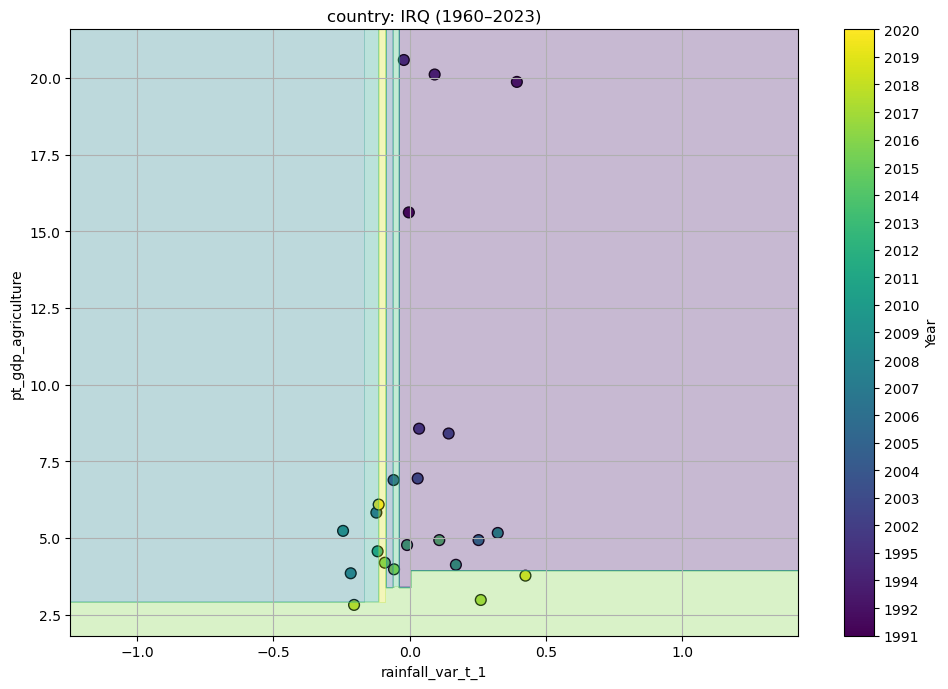

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Create a fixed mapping for consistent colors
unique_years = sorted(df_plot[y_label].unique())  # sorted list of years
year_to_code = {str(year): idx for idx, year in enumerate(unique_years)}
y_codes = y.map(year_to_code)

# Fit Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=10, random_state=0)  # Set random_state for reproducibility
#clf.fit(X, y)
clf.fit(X_train, y_train)

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Decision Tree Train MSE:", mean_squared_error(y_train, clf.predict(X_train), squared=False))
print("Decision Tree Train R²:", r2_score(y_train, clf.predict(X_train)))
print("Decision Tree Test MSE:", mean_squared_error(y_test, clf.predict(X_test), squared=False))
print("Decision Tree Test R²:", r2_score(y_test, clf.predict(X_test)))
print('')

# Prediction
predicted_year = clf.predict([[yearly_rainfall, gdp_agriculture]])
print(f"Predicted Year: {predicted_year[0]}")

# Create meshgrid for decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict over the meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = pd.Series(Z).map(year_to_code)  # Map predicted years to consistent codes
Z = Z.values.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y_codes, cmap='viridis', edgecolor='k', s=60)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

plt.xlabel(x1)
plt.ylabel(x2)
plt.title(f'country: {iso} ({year_begin}–{year_end})')
cbar = plt.colorbar(scatter, ticks=range(len(unique_years)))
cbar.ax.set_yticklabels(unique_years)  # Set year labels
cbar.set_label('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

## Using Random Forest for classification

Predicted Year: 2014

Random Forest Train MSE: 0.0
Random Forest Train R²: 1.0
Random Forest Test MSE: 6.899275324264136
Random Forest Test R²: 0.3299549549549551

              feature  importance_score
1  pt_gdp_agriculture          0.519577
0    rainfall_var_t_1          0.480423


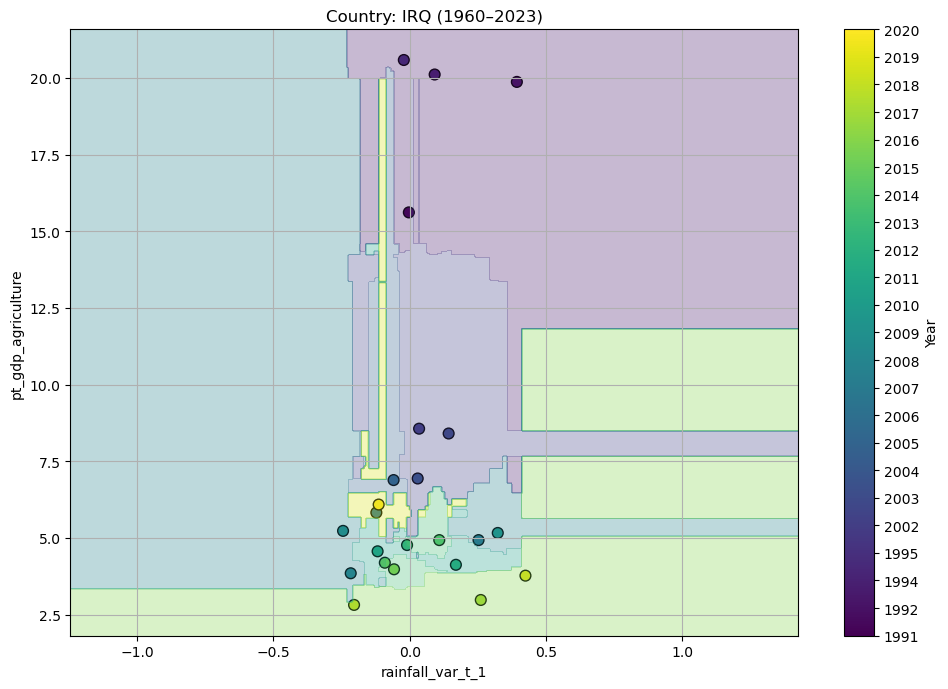

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# --- Extract features and target ---
X = df_plot[[x1, x2]].values
y = df_plot[y_label].astype(str).values  # Convert to string to treat year as class label

# --- Remove rows with NaN or inf values ---
mask = ~np.isnan(X).any(axis=1) & np.isfinite(X).all(axis=1)
X = X[mask]
y = y[mask]

# --- Train-test split ---
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# --- Fit Random Forest Classifier ---
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
rf.fit(X_train, y_train)

# --- Predict ---
predicted_year = rf.predict([[yearly_rainfall, gdp_agriculture]])
print(f"Predicted Year: {predicted_year[0]}")
print('')

# Features sorted by importance score
feature_names = [x1, x2]
score_df = pd.DataFrame({
    'feature': feature_names,
    'importance_score': rf.feature_importances_
})

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Random Forest Train MSE:", mean_squared_error(y_train, rf.predict(X_train), squared=False))
print("Random Forest Train R²:", r2_score(y_train, rf.predict(X_train)))
print("Random Forest Test MSE:", mean_squared_error(y_test, rf.predict(X_test), squared=False))
print("Random Forest Test R²:", r2_score(y_test, rf.predict(X_test)))
print('')

score_df = score_df.sort_values('importance_score', ascending=False)
print(score_df)

# --- Meshgrid for decision boundary ---
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# --- Predict over the grid ---
Z = rf.predict(np.c_[xx.ravel(), yy.ravel()])

# --- Map year labels to consistent codes for coloring ---
unique_years = sorted(pd.unique(y))
year_to_code = {year: i for i, year in enumerate(unique_years)}
y_codes = pd.Series(y).map(year_to_code)
Z_mapped = pd.Series(Z).map(year_to_code).values.reshape(xx.shape)

# --- Plot ---
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y_codes, cmap='viridis', edgecolor='k', s=60)
plt.contourf(xx, yy, Z_mapped, alpha=0.3, cmap='viridis')

plt.xlabel(x1)
plt.ylabel(x2)
plt.title(f'Country: {iso} ({year_begin}–{year_end})')

# --- Colorbar ---
cbar = plt.colorbar(scatter, ticks=range(len(unique_years)))
cbar.ax.set_yticklabels(unique_years)
cbar.set_label('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

## Using KNN regression to predict $GDP\space per\space capita$ for predicted year

KNN2 Train MSE: 883.2373492615685
KNN2 Train R²: 0.9163408278349835
KNN2 Test MSE: 962.1723182891495
KNN2 Test R²: -0.5284708554037847

KNN3 Train MSE: 863.372812691941
KNN3 Train R²: 0.9200616004630915
KNN3 Test MSE: 1017.2408834627935
KNN3 Test R²: -0.7084373549119432

The predicted gdp_percap for ['2014'] is (knr=2): 13624.8775
The predicted gdp_percap for ['2014'] is (knr=3): 13535.590000000002


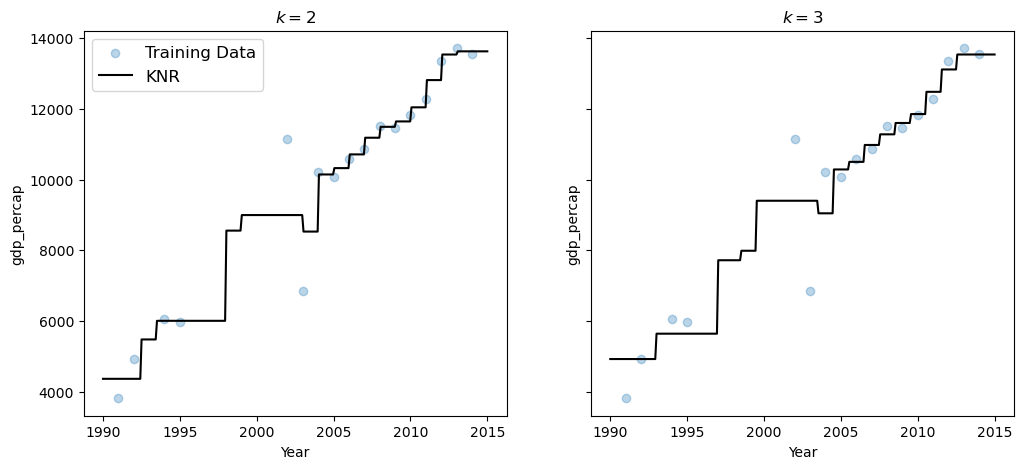

In [34]:
# Set feature and target column names
x1_ = 'Year'
y_ = 'gdp_percap'

# Extract features (X) and target (y)
x = df_plot[[x1_]].values
y = df_plot[y_].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x.reshape(-1,1), y, shuffle=False, random_state=0)

## import knnr
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.fit_transform(X_test)

## make model objects
knr_2 = KNeighborsRegressor(2)
knr_3 = KNeighborsRegressor(3)

## Fit the models
#knr_2 = knr_2.fit(X_scaled_train, y_train)
#knr_3 = knr_3.fit(X_scaled_train, y_train)
knr_2 = knr_2.fit(X_train, y_train)
knr_3 = knr_3.fit(X_train, y_train)

# Predict
#y_pred_knr_2 = knr_2.predict(X_scaled_test)
#y_pred_knr_3 = knr_3.predict(X_scaled_test)
y_pred_knr_2 = knr_2.predict(X_test)
y_pred_knr_3 = knr_3.predict(X_test)

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("KNN2 Train MSE:", mean_squared_error(y_train, knr_2.predict(X_train), squared=False))
print("KNN2 Train R²:", r2_score(y_train, knr_2.predict(X_train)))
print("KNN2 Test MSE:", mean_squared_error(y_test, knr_2.predict(X_test), squared=False))
print("KNN2 Test R²:", r2_score(y_test, knr_2.predict(X_test)))
print('')
print("KNN3 Train MSE:", mean_squared_error(y_train, knr_3.predict(X_train), squared=False))
print("KNN3 Train R²:", r2_score(y_train, knr_3.predict(X_train)))
print("KNN3 Test MSE:", mean_squared_error(y_test, knr_3.predict(X_test), squared=False))
print("KNN3 Test R²:", r2_score(y_test, knr_3.predict(X_test)))
print('')

# Predictions
predicted_year_new = predicted_year.reshape(1, -1)  # Reshapes to (1, 1)
gdp_percap_pred_knr_2 = knr_2.predict(predicted_year_new)
gdp_percap_pred_knr_3 = knr_3.predict(predicted_year_new)
print(f"The predicted {y_} for {predicted_year_new[0]} is (knr=2): {gdp_percap_pred_knr_2[0]}")
print(f"The predicted {y_} for {predicted_year_new[0]} is (knr=3): {gdp_percap_pred_knr_3[0]}")

## Plot the fits
fig,ax = plt.subplots(1, 2, figsize = (12,5), sharex=True, sharey=True)

ax[0].scatter(X_train, 
              y_train,
              alpha = .3,
              label="Training Data")
ax[1].scatter(X_train, 
              y_train,
              alpha = .3,
              label="Training Data")

ax[0].plot(np.linspace(np.min(X_train)-1,np.max(X_train)+1, 300).reshape(-1,1),
           knr_2.predict(np.linspace(np.min(X_train)-1,np.max(X_train)+1, 300).reshape(-1,1)),
           'k',
           label="KNR")

ax[0].set_xlabel(f'{x1_}')
ax[0].set_ylabel(f'{y_}')
ax[0].set_title(f'$k = 2$')

ax[1].plot(np.linspace(np.min(X_train)-1,np.max(X_train)+1, 300).reshape(-1,1),
           knr_3.predict(np.linspace(np.min(X_train)-1,np.max(X_train)+1, 300).reshape(-1,1)),
           'k',
           label="KNR")

ax[1].set_xlabel(f'{x1_}')
ax[1].set_ylabel(f'{y_}')
ax[1].set_title('$k = 3$')

ax[0].legend(fontsize=12)

plt.show()

## Using KNN regression to predict country's political instability given $GDP\space per\space capita$

Polity score: This score is determined by evaluating a country's political institutions and processes. It reflects the level of democracy, political competition, and participation. A positive score indicates democratic characteristics, while a negative score indicates autocratic characteristics.

Scale of the Polity score:

+10 to +6: Highly democratic (Democracies with strong political competition, participation, and civil liberties).

+5 to +1: Partly democratic (Countries with some democratic features, but there may be weaknesses in political competition or participation).

0: Mixed (Countries that are in transition between democracy and autocracy, with unclear or unstable governance).

-1 to -5: Partly autocratic (Countries where the government has more authoritarian traits, with limited political freedoms).

-6 to -10: Highly autocratic (Countries that are fully authoritarian, with severe restrictions on political freedom, civil liberties, and opposition).

KNN2 Train MSE: 1.3450606447536644
KNN2 Train R²: 0.9274950490964601
KNN2 Test MSE: 5.165344627802384
KNN2 Test R²: -0.008867187500000373

KNN3 Train MSE: 2.0294381854508092
KNN3 Train R²: 0.8349423769837996
KNN3 Test MSE: 5.3966625744203025
KNN3 Test R²: -0.10125000000000028

The predicted democracy_polity for gdp_percap=[13624.8775] is (knr=2): 4.5
The predicted democracy_polity for gdp_percap=[13535.59] is (knr=3): 4.0


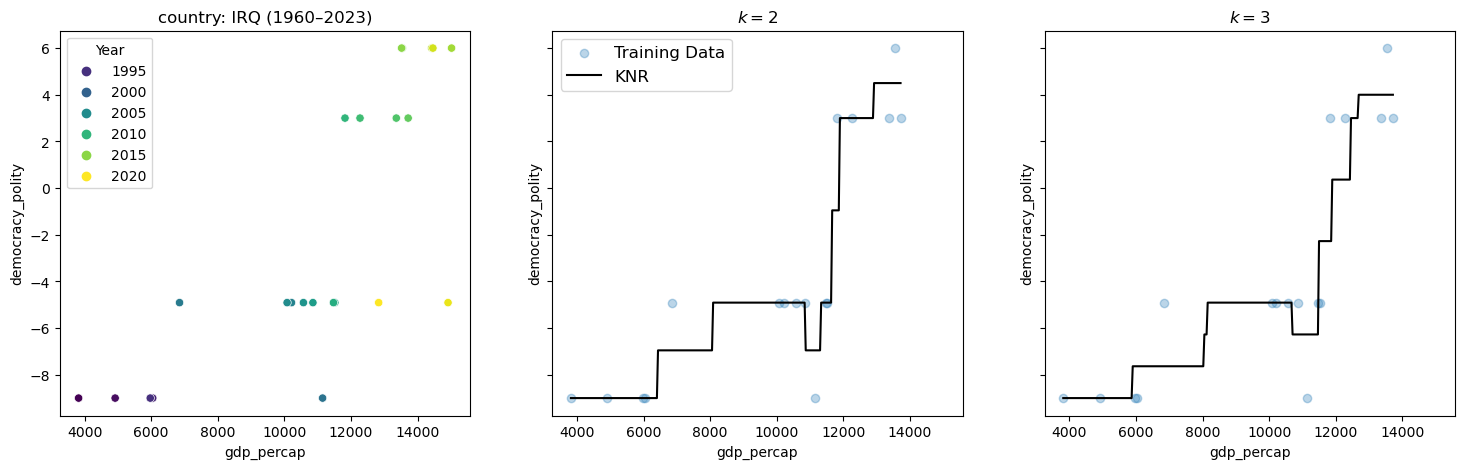

In [ ]:
# Set feature and target column names
x1_ = 'gdp_percap'
y_ = 'democracy_polity'

# Extract features (X) and target (y)
x = df_plot[[x1_]].values
y = df_plot[y_].values 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x.reshape(-1,1), y, shuffle= False, random_state=216)

## import knnr
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.fit_transform(X_test)

## make model objects
knr_2 = KNeighborsRegressor(2)
knr_3 = KNeighborsRegressor(3)

## Fit the models
#knr_2 = knr_2.fit(X_scaled_train, y_train)
#knr_3 = knr_3.fit(X_scaled_train, y_train)
knr_2 = knr_2.fit(X_train, y_train)
knr_3 = knr_3.fit(X_train, y_train)

# Predict
#y_pred_knr_2 = knr_2.predict(X_scaled_test)
#y_pred_knr_3 = knr_3.predict(X_scaled_test)
y_pred_knr_2 = knr_2.predict(X_test)
y_pred_knr_3 = knr_3.predict(X_test)

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("KNN2 Train MSE:", mean_squared_error(y_train, knr_2.predict(X_train), squared=False))
print("KNN2 Train R²:", r2_score(y_train, knr_2.predict(X_train)))
print("KNN2 Test MSE:", mean_squared_error(y_test, knr_2.predict(X_test), squared=False))
print("KNN2 Test R²:", r2_score(y_test, knr_2.predict(X_test)))
print('')
print("KNN3 Train MSE:", mean_squared_error(y_train, knr_3.predict(X_train), squared=False))
print("KNN3 Train R²:", r2_score(y_train, knr_3.predict(X_train)))
print("KNN3 Test MSE:", mean_squared_error(y_test, knr_3.predict(X_test), squared=False))
print("KNN3 Test R²:", r2_score(y_test, knr_3.predict(X_test)))
print('')

# If the feature used during training is `gdp_percap`, and we want to predict for a new value:
gdp_percap_pred_knr_2_new = gdp_percap_pred_knr_2.reshape(1, -1)  # Reshapes to (1, 1)
gdp_percap_pred_knr_3_new = gdp_percap_pred_knr_3.reshape(1, -1)  # Reshapes to (1, 1)
democracy_polity_pred_knr_2 = knr_2.predict(gdp_percap_pred_knr_2_new)
democracy_polity_pred_knr_3 = knr_3.predict(gdp_percap_pred_knr_3_new)
print(f"The predicted {y_} for {x1_}={gdp_percap_pred_knr_2_new[0]} is (knr=2): {democracy_polity_pred_knr_2[0]}")
print(f"The predicted {y_} for {x1_}={gdp_percap_pred_knr_3_new[0]} is (knr=3): {democracy_polity_pred_knr_3[0]}")

## Plot the fits
fig,ax = plt.subplots(1, 3, figsize = (18,5), sharex=True, sharey=True)

# Plot on axis 3 (index 2)
sns.scatterplot(data=df_plot, x=x1_, y=y_, ax=ax[0], hue='Year', palette='viridis')
ax[0].set_xlabel(f'{x1_}')
ax[0].set_ylabel(f'{y_}')
ax[0].set_title(f'country: {iso} ({year_begin}–{year_end})')

ax[1].scatter(X_train, 
              y_train,
              alpha = .3,
              label="Training Data")
ax[2].scatter(X_train, 
              y_train,
              alpha = .3,
              label="Training Data")

ax[1].plot(np.linspace(np.min(X_train)-1,np.max(X_train)+1, 300).reshape(-1,1),
           knr_2.predict(np.linspace(np.min(X_train)-1,np.max(X_train)+1, 300).reshape(-1,1)),
           'k',
           label="KNR")

ax[1].set_xlabel(f'{x1_}')
ax[1].set_ylabel(f'{y_}')
ax[1].set_title(f'$k = 2$')

ax[2].plot(np.linspace(np.min(X_train)-1,np.max(X_train)+1, 300).reshape(-1,1),
           knr_3.predict(np.linspace(np.min(X_train)-1,np.max(X_train)+1, 300).reshape(-1,1)),
           'k',
           label="KNR")

ax[2].set_xlabel(f'{x1_}')
ax[2].set_ylabel(f'{y_}')
ax[2].set_title('$k = 3$')

ax[1].legend(fontsize=12)

plt.show()